In [1]:
# Chceme data rozdělit do více skupin, např. kvůli reklamě
# Generování newsletterů pro nějakou skupinu lidí

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Unsupervised learning

Doposud jsme se zabývali klasifikací, jako jednou s podtříd supervized learning, tedy úloh, kde předem známe správné odpovědi. Model se pomocí algoritmu a trénovacích dat, které obsahují tyto správné odpovědi, "naučí" jak jednotlivé třídy vypadají, aby později mohl přiřazovat nová data do tříd. V případě regresní úlohy nová data nedostanou přiřazenou třídu, ale nějakou hodnotu jako reálné číslo. Obecný koncept je ale stejný.

V této lekci se budeme věnovat úlohám bez supervize, tedy takovým, kde **předem neznáme správné odpovědi,** nebo tyto odpovědi vůbec neexistují. 

Příklady takových úloh jsou: 

- rozdělování dat na shluky (clustering), na rozdíl od klasifikačních úloh **ale nevíme o žádném záznamu, do kterého shluku patří, ani nevíme, kolik by takových shluků mělo být,**
- hledání anomálií v datech (tj. hledáme něco neobvyklého, například neobvyklé datové toky v síti nebo podivné údaje z nějakého měřícího zařízení).

### Shlukování dat (clustering)

Na obrázku například vidíme data, nad kterými by se dalo přemýšlet jako nad dvěma nebo třemi shluky. Důležité je, že o žádném údaji nevíme, do kterého shluku by měl patřit! Rozdělení je tedy čistě na nás. Je na nás, na kolik shluků data rozdělíme.

![clustering.png](attachment:clustering.png)

### K-means

Ukážeme si shlukovací algoritmus K-means. _K_ proto, že očekává zadaný počet shluků od uživatele, a _means_ zde znamená průměr - střed shluku neboli _centroid_.

Algoritmus k-means se skládá z následujících kroků:

1. **Výběr počtu shluků (k)**: Algoritmus k-means vyžaduje, abyste předem určili počet shluků, které chcete vytvořit. Počet těchto shluků se označuje jako 'k'. Algoritmus můžeme spouštět opakovaně a různým počtem nastavených shluků a sledovat, jak dobře takový počet "sedí" na naše data.
1. **Náhodná inicializace středů shluků**: Poté, co jsme určili hodnotu 'k', algoritmus náhodně vybere 'k' bodů z datové sady. Tyto body se stávají prvními 'centroidy' - tedy středy shluků.
1. **Přiřazení bodů k nejbližším středům shluků**: Každý bod v datové sadě se nyní přiřadí k tomu centroidu, ke kterému má nejkratší vzdálenost. Tím se vytvoří dočasné shluky.
1. **Přesu středů shluků**: Poté, co jsou všechny body přiřazeny k shlukům, algoritmus spočítá nový střed každého shluku jako průměr všech bodů, které do tohoto shluku patří. Následně je *centroid* přesunutý do středu shluku.
1. **Opakování kroků 3 a 4**: Algoritmus nyní opakuje kroky 3 a 4, dokud se středy shluků nepřestanou posouvat nebo dokud se nevyčerpá předem stanovený počet iterací. Každá iterace upřesňuje středy shluků a přiřazuje body k novým středům.

![kmeans.png](attachment:kmeans.png)

In [2]:
X = pd.read_csv("CC_GENERAL.csv")
X = X.head(1000) # tím budu pracovat jenom s 1000 dat, co je nahoře, abych si to zrychlila 

Úloha, která nás bude provázet lekcí, se klasifikace uživatelů kreditních karet, která jsou v souboru [CC_GENERAL.CSV](CC_GENERAL.CSV).

[Zdroj dat](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download)

Popisy sloupců (features):

* CUST_ID: Identifikace držitele kreditní karty (Kategorické)
* BALANCE: Zůstatek na účtu pro nákupy
* BALANCE_FREQUENCY: Jak často se aktualizuje zůstatek, skóre mezi 0 a 1 (1 = často aktualizováno, 0 = nečasto aktualizováno)
* PURCHASES: Částka nákupů provedených z účtu
* ONEOFF_PURCHASES: Maximální částka nákupu provedená najednou
* INSTALLMENTS_PURCHASES: Částka nákupu provedená na splátky
* CASH_ADVANCE: Hotovost předem poskytnutá uživatelem
* PURCHASES_FREQUENCY: Jak často se provádějí nákupy, skóre mezi 0 a 1 (1 = často nakupováno, 0 = nečasto nakupováno)
* ONEOFFPURCHASESFREQUENCY: Jak často se provádějí nákupy najednou (1 = často nakupováno, 0 = nečasto nakupováno)
* PURCHASESINSTALLMENTSFREQUENCY: Jak často se provádějí nákupy na splátky (1 = často prováděno, 0 = nečasto prováděno)
* CASHADVANCEFREQUENCY: Jak často se platí hotovost předem
* CASHADVANCETRX: Počet transakcí provedených s "Cash in Advanced"
* PURCHASES_TRX: Počet provedených nákupních transakcí
* CREDIT_LIMIT: Limit kreditní karty pro uživatele
* PAYMENTS: Částka platby provedená uživatelem
* MINIMUM_PAYMENTS: Minimální částka plateb provedených uživatelem
* PRCFULLPAYMENT: Procento úplné platby uhrané uživatelem
* TENURE: Doba trvání služby kreditní karty pro uživatele

In [3]:
X = X.drop(columns=["CUST_ID"])

In [4]:
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [5]:
X.shape

(1000, 17)

In [6]:
#standard scaler je potřeba, protože ten algoritmus pracuje se vzdálenostmi

In [7]:
scaler = StandardScaler() # aby měly jednotné rozsahy, ta data
X = scaler.fit_transform(X)


In [8]:
# Snížení dimensionality 
# vizualizace dat - máme 17 rozměrů - zredukujeme si to na 2 rozměry

#TSNE T-distributed Stochastic Neighor Embedding - uvažujeme nějaké sousedy
# n_components - kolik dimenzí chceme, volíme 2 nebo 3
# perplexity - určuje, dle kolika sousedů se má metoda t-SNE řídit. Čím vyšší je náš dataset, 
    #tím vyšší hodnotu parametru nastavíme. Běžně se používají hodnoty mezi 5 a 50.
# body, které jsou podobné v 17D prostoru, chci, aby byly podobné i v 2D prostoru


### Snížení dimensionality

U shlukování je vždy dobré si data **vizualizovat**. Jak ale na to? Máme celkem 17 proměnných, to je jako 17-ti dimenzionální prostor. Vizualizovat umíme ve dvou dimenzích, možná i ve třech. V jedenácti ale těžko.

Modul `scikit-learn` má k dispozici nástroje na snížení dimenzionality ("sníže počtu proměnných"). Snížení počtu proměnných má několik výhod. Nejenom, že můžeme pak data snáz vizualizovat, ale zbavíme se problému kolinearity (korelace dvou nebo více proměnných), a navíc snížíme čas a výkon potřebný pro další modelování.

Redukce dimensionality je postup, který se snaží zachovat původní strukturu dat a minimalizovat ztrátu informace, ke které dojde při odebrání některých sloupců.

Jedna z metod, která nám sníží počet proměnných ("redukuje dimenzionalitu") se jmenuje t-SNE (t-distributed Stochastic Neighbor Embedding). Modul `scikit-learn` tuto metodu implementuje, pojďme jí vyzkoušet.

`TSNE` má několik důležitých parametrů:
- `n_components` říká, kolik dimenzí (proměnných) chceme. U t-SNE typicky volíme hodnotu 2 nebo 3.
- `perplexity` určuje, podle kolika sousedů se má metoda t-SNE řídit. Čím vyšší je náš dataset, tím vyšší hodnotu parametru nastavíme. Běžně se používají hodnoty mezi 5 a 50.

Princip metody spočívá v tom, že se snaží při redukci počtu dimenzí udržovat body, které jsou si v původní dimenzi blízké, blízko u sebe. 

In [9]:
tsne = TSNE(
    n_components=2,
    random_state=42,
)
X = tsne.fit_transform(X)
#perplexity default je 30.0
model = KMeans(n_clusters=4, random_state=42, n_init="auto") # uvažujme, že chceme vytvořit 4 shluky
labels = model.fit_predict(X)
#vytvoříme si model, chceme 2 clustery, random state - aby to bylo vždy stejné,n_init=auto - vložení těch výchozích bodů


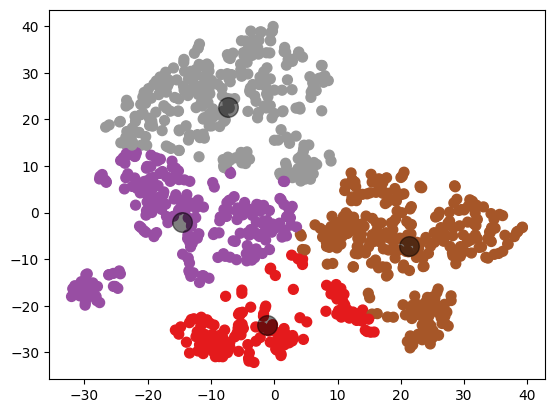

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Set1") # Zobrazení bodů, set1 určuje barevný set 
centers = model.cluster_centers_ # Zjištění centroidů - vložení středů těch clusterů - to není vyloženě nutné
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5) # Zobrazení centroidů, vykreslení

In [11]:
X.shape

(1000, 2)

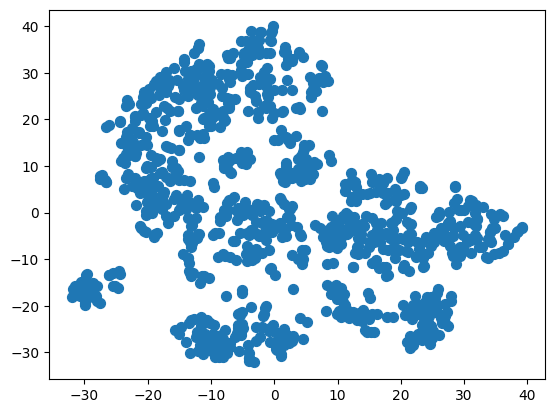

In [12]:
#plt.scatter(X[:,0],X[:,1],s=50)
plt.scatter(X[:, 0], X[:, 1], s=50)
# chci všechny řádky a sloupec 0 
# chci všechny řádky a sloupec 1


In [13]:
# jak poznat, kolik těch shluků je
# metrika intertia - nám pomůže určit, kolik těch schluků je
# spočítá pro každou tečku vzdálenost ke středu a dá je nadruhou
# čím budeme mít středů víc, tím bude ta metrika menší
# krajská města - je průměrná vzálenost do města 
# když by bylo krajských měst víc (např. nad 3000obyv), tak bychom to měli blíže do těch měst

Dva shluky ale nemusejí být to správné číslo. Jak poznat, kolik shluků bychom měli mít? K tomu můžeme využít například metriku inertia. Tato metrika je výpočet sumy kvadratických vzdáleností všech bodů v shluků ke středu shluku, neboli centroidu. Čím více máme shluků, tím spíše bude vzdálenost klesat. Ale je pravděpodobné, že tempo poklesu bude s růstem klastrů klesat. Není tedy naším cílem vytvořit model s obrovským množstvím shluků (takový by nám toho stejně moc neřekl). Ve skutečnosti chceme vybrat počet, ve kterém počet klastrů výrazně zpomaluje.

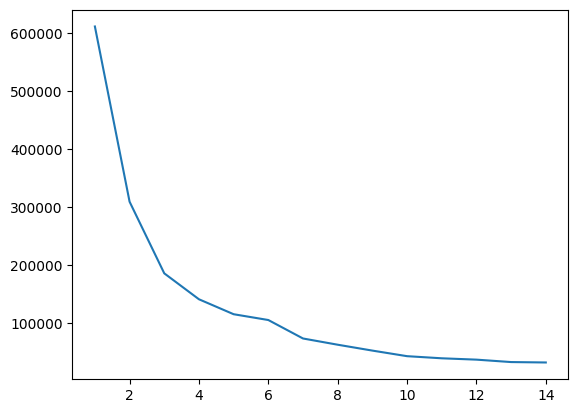

In [14]:
distances = []
cluster_counts = range(1, 15) # pomocí cyklu měníme počet rozsahů od 1 do 15
 
for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    model.fit(X) # nalezení shluků
    distances.append(model.inertia_) # z modelu si mohu zjistit hodnotu kriteria a tu si vložím do seznamu

plt.plot(cluster_counts, distances,) # cluster_counts je na vodorovné, distances - na svislé ose

In [15]:
# načtení informace
data = pd.read_csv("CC_GENERAL.csv")
data = data.drop(columns = "CUST_ID")
data = data.head(1000)
data["cluster"] = labels
data.groupby("cluster").mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,231.064785,0.597997,810.297114,333.722148,477.172148,237.590148,0.485337,0.090170,0.406288,0.023714,0.503356,9.946309,5823.489933,1698.101598,199.976436,0.393352,11.805369
1,1333.444765,0.947868,514.621829,392.494634,122.326382,435.586195,0.270916,0.148871,0.136980,0.064018,1.097561,5.219512,3819.308943,1023.039390,582.814606,0.022970,11.313008
2,2473.193768,0.984741,4053.074618,2570.506445,1482.725183,419.917967,0.950461,0.504208,0.799841,0.056806,1.229236,48.352159,7781.395349,4163.628054,1312.959018,0.236029,11.953488
3,4336.432490,0.983384,614.633355,436.800132,177.833224,3468.554104,0.331765,0.214783,0.155398,0.352464,9.424342,7.963816,7034.868421,3186.783951,2383.591737,0.019356,11.710526


In [16]:
data.groupby("cluster").size()

cluster
0    149
1    246
2    301
3    304
dtype: int64

In [17]:
X = pd.read_csv("wine-regions.csv")

In [18]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
scaler = StandardScaler() # aby měly jednotné rozsahy, ta data
X = scaler.fit_transform(X)


In [20]:
#tsne = TSNE(
#    n_components=2,
#    random_state=42,
#)
#X = tsne.fit_transform(data)
#model = KMeans(n_clusters=3, random_state=42, n_init="auto") # uvažujme, že chceme vytvořit 4 shluky
#labels = model.fit_predict(X)

In [21]:
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Set1") # Zobrazení bodů, set1 určuje barevný set 
#centers = model.cluster_centers_ # Zjištění centroidů - vložení středů těch clusterů - to není vyloženě nutné
#plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5) # Zobrazení centroidů, vykreslení

In [22]:
# nový pokus
# Proveď redukci dimenzionality na 2 dimenze. Vykresli data pomocí grafu. 
# Poznáš z grafu, kolik by byl nejlepší počet shluků? Následně zkus určit metriku 
# inertia pro 2 až 10 shluků. Pro jaký počet shluků dochází k výraznému sníže tempa 
# jejího poklesu? Následně pro tento počet vykresli graf včetně centroidů.

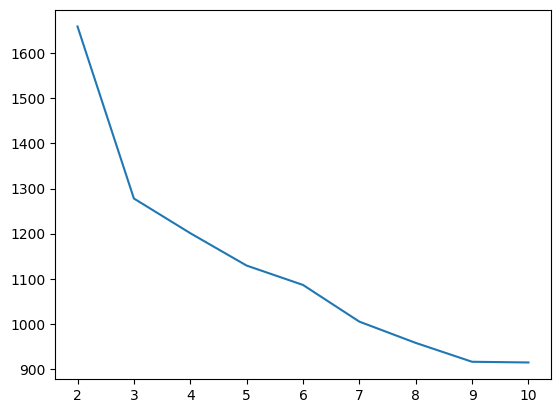

In [23]:
distances = []
cluster_counts = range(2, 11) # pomocí cyklu měníme počet rozsahů od 1 do 15
 
for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    model.fit(X) # nalezení shluků
    distances.append(model.inertia_) # z modelu si mohu zjistit hodnotu kriteria a tu si vložím do seznamu

plt.plot(cluster_counts, distances,) # cluster_counts je na vodorovné, distances - na svislé ose

In [24]:
X = pd.read_csv("wine-regions.csv")

In [25]:
scaler = StandardScaler() # aby měly jednotné rozsahy, ta data
X = scaler.fit_transform(X)

In [26]:
tsne = TSNE(
    n_components=2,
    random_state=42,
)
X = tsne.fit_transform(X)
model = KMeans(n_clusters=3, random_state=42, n_init="auto") # uvažujme, že chceme vytvořit 4 shluky
labels = model.fit_predict(X)

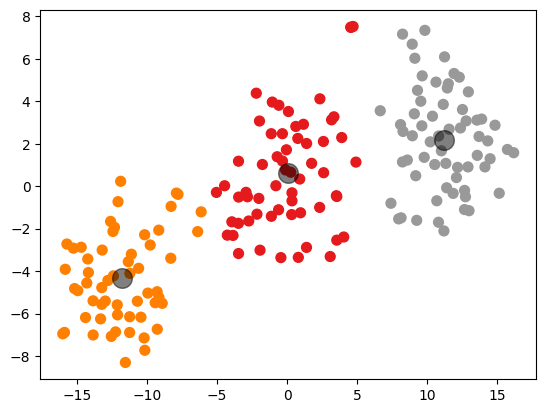

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Set1") # Zobrazení bodů, set1 určuje barevný set 
centers = model.cluster_centers_ # Zjištění centroidů - vložení středů těch clusterů - to není vyloženě nutné
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5) # Zobrazení centroidů, vykreslení

In [28]:
# Redukce dimenzionality není nutná. Zkus nyní znovu načíst data a vykresli graf metriky 
# inertia pro 1 až 10 shluků na datech s původní dimenzí. Změnil se graf nějak výrazně? 
# Změnilo by to tvé rozhodnutí o počtu shluků?

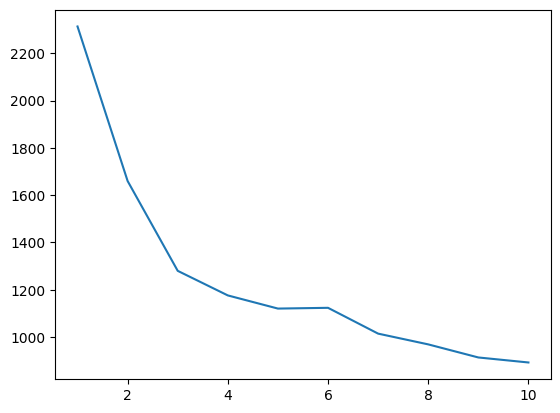

In [29]:
X = pd.read_csv("wine-regions.csv")
scaler = StandardScaler() # aby měly jednotné rozsahy, ta data
X = scaler.fit_transform(X)

distances = []
cluster_counts = range(1, 11) # pomocí cyklu měníme počet rozsahů od 1 do 15
 
for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    model.fit(X) # nalezení shluků
    distances.append(model.inertia_) # z modelu si mohu zjistit hodnotu kriteria a tu si vložím do seznamu

plt.plot(cluster_counts, distances,)

In [30]:
data = pd.read_csv("wine-regions.csv")
data["cluster"] = labels
data.groupby("cluster").mean()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
cluster,,,,,,,,,,,,,
0,12.221833,1.911333,2.212333,20.086667,92.400000,2.277500,2.115667,0.354000,1.703000,2.963833,1.063167,2.858167,504.383333
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,13.699194,1.997742,2.473871,17.559677,106.741935,2.854839,3.012742,0.290323,1.899355,5.466129,1.068710,3.171935,1091.725806


In [31]:
# country data 
#Níže je význam jednotlivých sloupců:

#child_mort - Úmrtnost dětí do 5 let věku na 1000 živě narozených dětí
#exports - Export zboží a služeb na osobu. Udáváno jako procento HDP na osobu
#health - Celkové výdaje na zdravotnictví na osobu. Udáváno jako procento HDP na osobu
#imports - Import zboží a služeb na osobu. Udáváno jako procento HDP na osobu
#income - Čistý příjem na osobu
#inflation - Měření roční míry růstu celkového HDP
#life_expec - Průměrný počet let, které by novorozené dítě žilo, pokud by současné vzorce úmrtnosti zůstaly stejné
#total_fer - Počet dětí, které by se narodily každé ženě, pokud by současné věkové plodnostní sazby zůstaly stejné
#gdpp - HDP na osobu

In [32]:
X = pd.read_csv("Country-data.csv")

In [33]:
X.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


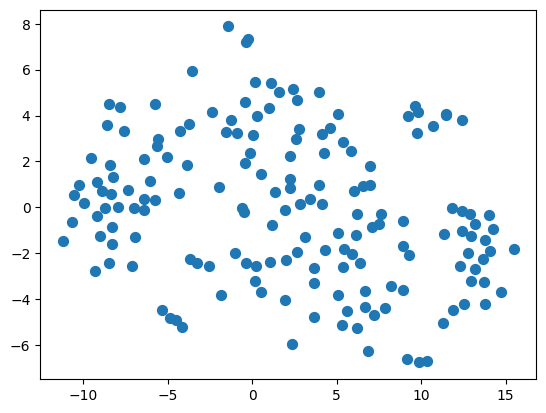

In [43]:
X = pd.read_csv("Country-data.csv")
X.head()
X = X.drop(columns="country")

scaler = StandardScaler()
X = scaler.fit_transform(X)

tsne = TSNE(n_components=2,random_state=42)
X = tsne.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=50)

In [48]:
model = KMeans(n_clusters=2,random_state=42, n_init="auto")
labels = model.fit_predict(X)

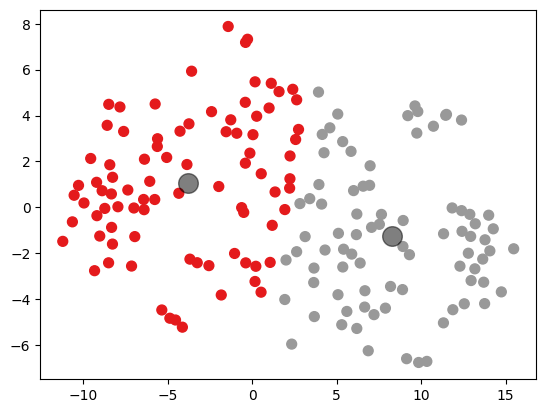

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Set1")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

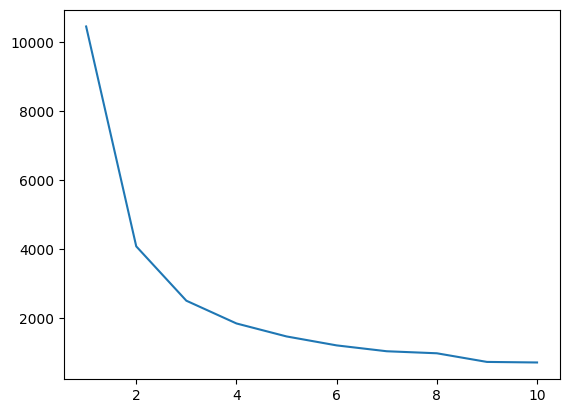

In [50]:
distances = []
cluster_counts = range(1, 11) # pomocí cyklu měníme počet rozsahů od 1 do 15
 
for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    model.fit(X) # nalezení shluků
    distances.append(model.inertia_) # z modelu si mohu zjistit hodnotu kriteria a tu si vložím do seznamu

plt.plot(cluster_counts, distances,)